### Matrix of Destiny — Theoretical Background

This notebook implements the "Matrix of Destiny", a numerological system
that interprets a person's birth date through symbolic numerical structures.
___
Each individual has **five core numbers** derived from their birth date: Day, Month, Year, Karmic, and Comfort numbers. 
Additionally, there are **four Corner Numbers**, calculated from the sums of adjacent diagonal numbers.

Each number carries a **specific symbolic meaning**, which can be interpreted to understand personal traits, challenges, and potentials.

**In the diamond:**

- **Center (Comfort / Core Energy)** — your soul’s essence, purpose, and inner balance.
- **Left (Portrait)** — how others see you; your social image.
- **Top (Hidden Talents)** — natural gifts and potential waiting to be developed.
- **Right (Material Karma)** — lessons and blocks related to money, work, and success.
- **Bottom (Spiritual Karma)** — deep karmic lessons and spiritual growth.

**In the inner square (ancestral programs):**

- **Top left** — father’s spiritual lineage.
- **Top right** — mother’s spiritual lineage.
- **Bottom left** — father’s material lineage.
- **Bottom right** — mother’s material lineage.
___
This notebook calculates these numbers, visualizes the matrix as colored circles in overlapping squares forming an octagon, 
and provides symbolic interpretations using an external arcana text file.


### Input and Data Extraction

This cell requests the user's birth date in the format `"DD.MM.YYYY"`.
It validates the input format minimally by splitting the string and converting
day, month, and year components to integers.


In [2]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# === Main input block ===
birth = input("Enter your birth date (DD.MM.YYYY): ").strip()
parts = birth.split('.')
day = int(parts[0])
month = int(parts[1])
year = int(parts[2])

Enter your birth date (DD.MM.YYYY):  13.06.2006


### Helper Function: reduce_to_22

This function reduces any number to a value less than or equal to 22 by repeatedly summing its digits.

**Mathematical Principle:**
If `n > 22`, sum its digits until the result ≤22.

In [5]:
def reduce_to_22(n):
    """
    Reduces a number to a value ≤ 22 by repeatedly summing its digits.

    Parameters:
        n (int) -- input number to be reduced.

    Steps:
        1. Convert the number to a string and extract each digit.
        2. Sum the digits.
        3. Repeat until the result is ≤ 22.

    Returns:
        n (int) -- Reduced number in the range from 1 to 22.
    """
    while n > 22:
        n = sum(int(d) for d in str(n))
    return n


### Number Calculations

The five core numbers are computed from the birth date as follows:

1. **Day Number** — the day of birth reduced to ≤22 by summing digits.
2. **Month Number** — the month of birth (1–12).
3. **Year Number** — sum of all digits of the year, reduced to ≤22.
4. **Karmic Number** — sum of Day + Month + Year, reduced to ≤22.
5. **Comfort Number** — sum of Day + Month + Year + Karmic, reduced to ≤22.
6. **Corner Numbers** — each is the sum of two adjacent diagonal numbers from the main square, reduced to ≤22.

In [7]:
day_num = reduce_to_22(day)
month_num = reduce_to_22(month)
year_num = reduce_to_22(sum(int(d) for d in str(year)))
karmic_num = reduce_to_22(day_num + month_num + year_num)
comfort_num = reduce_to_22(day_num + month_num + year_num + karmic_num)

matrix_values = {
    "Top": month_num,
    "Right": year_num,
    "Bottom": karmic_num,
    "Left": day_num,
    "Center": comfort_num
}

corners = [
    reduce_to_22(matrix_values["Top"] + matrix_values["Right"]),
    reduce_to_22(matrix_values["Right"] + matrix_values["Bottom"]),
    reduce_to_22(matrix_values["Bottom"] + matrix_values["Left"]),
    reduce_to_22(matrix_values["Left"] + matrix_values["Top"])
]


### Matrix Visualization

The matrix is visualized as two overlapping squares forming an octagon:

- Outer square: represents main numbers (Top, Right, Bottom, Left).
- Inner square: represents corners.
- Center number is placed in the middle.
- Colors are used to differentiate types of numbers, and you can customize them.

The figure is automatically saved as `Matrix_of_Destiny_DD-MM-YYYY.png`.

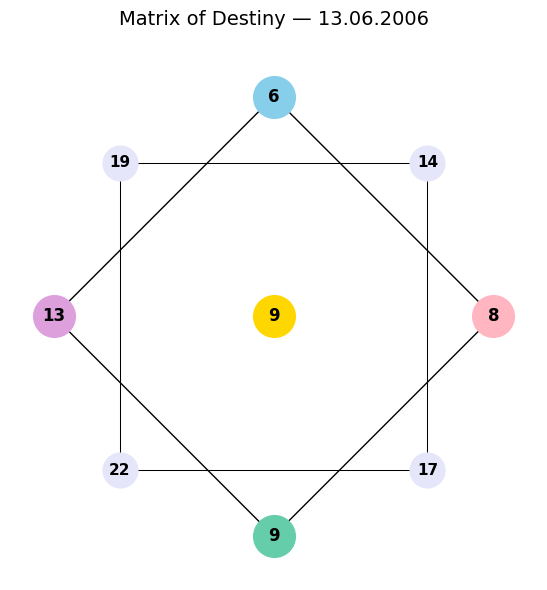

In [9]:
colors = {
    "Top": "skyblue",
    "Right": "lightpink",
    "Bottom": "mediumaquamarine",
    "Left": "plum",
    "Center": "gold",
    "Corners": "lavender"
}

outer_x = [0, 1, 0, -1, 0]
outer_y = [1, 0, -1, 0, 1]
inner_x = [0.7, 0.7, -0.7, -0.7, 0.7]
inner_y = [0.7, -0.7, -0.7, 0.7, 0.7]

positions = {
    "Top": (0, 1),
    "Right": (1, 0),
    "Bottom": (0, -1),
    "Left": (-1, 0),
    "Center": (0, 0)
}
corner_positions = [(0.7, 0.7), (0.7, -0.7), (-0.7, -0.7), (-0.7, 0.7)]

plt.figure(figsize=(6, 6))
plt.plot(outer_x, outer_y, color="black", lw=1)
plt.plot(inner_x, inner_y, color="black", lw=0.75)

# Main circles
for key, (x, y) in positions.items():
    plt.plot(x, y, 'o', markersize=30, color=colors[key])
    plt.text(x, y, str(matrix_values[key]), ha='center', va='center',
             fontsize=12, fontweight='bold', color='black')

# Corner circles
for i, (x, y) in enumerate(corner_positions):
    plt.plot(x, y, 'o', markersize=25, color=colors["Corners"])
    plt.text(x, y, str(corners[i]), ha='center', va='center',
             fontsize=11, fontweight='bold', color='black')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.gca().set_aspect('equal')
plt.xticks([]); plt.yticks([])
plt.gca().set_frame_on(False)
plt.title(f"Matrix of Destiny — {birth}", fontsize=14, pad=20)
plt.tight_layout()

# Save the figure as a PNG file named by birth date
filename = f"Matrix_of_Destiny_{birth.replace('.', '-')}.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()



### Arcana Interpretation

This section loads symbolic interpretations from a tab-separated file.
Each number is associated with:

- **Name** — arcan name.
- **General Meaning** — influence of the number in life.
- **Center Interpretation** — description of persons character.
- **Birth Card Interpretation** — description of social image.

In [11]:
arcana_file = "matrix_interpretation.txt"

arcana_data = {}
with open(arcana_file) as f:
    lines = f.readlines()
    for line in lines[1:]:
        parts = line.split('\t')
        num = int(parts[0])
        arcana_data[num] = {
            "name": parts[1],
            "general": parts[2],
            "center": parts[3],
            "birth_card": parts[4]
        }

center_num = matrix_values["Center"]
birth_card_num = matrix_values["Left"]

print("\n=== ARCANA INTERPRETATION ===\n")
print("Center:", center_num, "-", arcana_data[center_num]["name"], "-", arcana_data[center_num]["center"])
print("Portrait (Left):", birth_card_num, "-", arcana_data[birth_card_num]["name"], "-", arcana_data[birth_card_num]["birth_card"])

print("\nOther main Arcanas:")
for key in ["Top", "Right", "Bottom"]:
    num = matrix_values[key]
    print(num, "-", arcana_data[num]["name"], "-", arcana_data[num]["general"])

print("\nBig Square Corners:")
for i in range(len(corners)):
    num = corners[i]
    print("Corner", i+1, ":", num, "-", arcana_data[num]["name"], "-", arcana_data[num]["general"])



=== ARCANA INTERPRETATION ===

Center: 9 - The Hermit  - In central position, The Hermit signifies a seeker of knowledge and inner illumination. The life path involves self-analysis, research, and teaching by example. The key is learning balance between isolation and sharing. 
Birth Card (Left): 13 - Death  - Outwardly intense, magnetic, sometimes mysterious. May change appearance or lifestyle radically throughout life. Projects depth and emotional gravity. 


Other main Arcanas:
6 - The Lovers  - Represents relationships, duality, harmony, and choice guided by love and values. Symbol of emotional connection and ethical decision-making. 
8 - Justice  - Symbolizes fairness, balance, law, and moral accountability. Represents evaluation and rational clarity. 
9 - The Hermit  - Symbol of solitude, introspection, and pursuit of truth. Associated with wisdom, patience, and spiritual maturity. 

Big Square Corners:
Corner 1 : 14 - Temperance  - Symbolizes moderation, harmony, and healing. Re